# RIT DSCI-633: Foundations of Data Science and Analytics
## Assignment 1
### Due: 11:59 pm EST, Saturday, Oct 2, 2021

### Problem 1 (10 points)

In statistics and probability theory, the law of large numbers is a theorem that describes the result of
repeating the same experiment a large number of times. The theorem states that if the same
experiment or study is repeated independently a large number of times, the average of the results of
the trials must be close to the expected value. The result becomes closer to the expected value as the
number of trials is increased. Let us look at a specific experiment.

Assume you have a Gaussian distribution (commonly called a “bell curve”) with mean µ and std
deviation σ. The area under the curve that lies between σ and 2σ, and –σ and -2σ is approximately
27.2%. In other words, approximately 27.2% of numbers generated randomly using this distribution will
fall in the range [µ + σ, µ + 2σ] or [µ - 2σ, µ - σ], as shown below.

Generate N random numbers that follow a Gaussian distribution with µ = 100, σ = 10, and count the
numbers M that fall into the ranges above. Print the fraction M/N. Repeat this for N = 10, 100, 1000,
10000, and 1000000.

Does the fraction start to approach 27.2%?


### Solution

In [1]:
#import packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Generate arrays of random samples from normal distribution
N=[10,100,1000,10000,1000000]
def generateNormSample(mu,sigma,list_sample_sizes):
    import numpy as np
    samplesN=[]
    for n in list_sample_sizes:
        randomSample = np.random.normal(loc=mu,scale=sigma,size=n)
        samplesN.append(randomSample)
    return samplesN
samplesN=generateNormSample(100,10,N)
        

In [3]:
#We are looking for fraction of numbers between [mu-2sigma, mu-sigma] or [mu+sigma,mu+2sigma].
#So we are looking for proportion of numbers [80,90] or [110,120]

for n in range(len(samplesN)):
    #Creates a boolean numpy array that shows how many numbers satisfy conditions
    #and sums for the total true=1 false=0
    M=np.sum((samplesN[n]>80) & (samplesN[n]<90)) + np.sum((samplesN[n]>110)&(samplesN[n]<120))
    N=len(samplesN[n])
    proportion=M/N
    print("Proportion M/N for N = "+str(N)+": "+str(proportion))

Proportion M/N for N = 10: 0.1
Proportion M/N for N = 100: 0.26
Proportion M/N for N = 1000: 0.271
Proportion M/N for N = 10000: 0.2772
Proportion M/N for N = 1000000: 0.271555


In [4]:
#As we can see above, the proportion does converge to the thoretical proportion of
#approximately 27.2%

<font color = 'green'> Correct : 10 points </font> 

### Problem 2 (5 points)

Imagine you have a dataset of movie ratings for a set of 500 popular movies and a set of 1000 users.
Each data sample contains the ratings of each movie (from 1 to 5 stars) by a specific user. The rating is
an integer in the range [0,5], with a value of 0 means that the user did not watch that movie.
How would you convert this data to a form suitable for association analysis? In particular, what type of
attributes would you have and how many of them?



### Solution

The table would consist of 1000 rows and 500 columns, with each row representing an individual user and each column representing an individual movie.  The original rating scale would be changed from [0,5] to [0,3] to be interpreted as 0 - did not see, 1 - did not like, 2 - neutral, and 3 - liked. A value of 0 would remain "did not see".  A value of 1 would be the binning of the original values [1,2].  A value of 2 would be the binning of the original value [3].  And a value of 3 would be a binning of the original values [4,5].  This transformation would sacrifice granularity to provide a clearer signal as for the purpose of our association analysis i.e. finding a general associative pattern in user movie preferences.  To be most clear, the question we are trying to answer is, "do certain sets of movie preferences associate to other sets of movie preferences".  Further, higher level, analysis could then be conducted by grouping the movies by genre and taking the average score over each genre for each user.  Associations obtained by this higher level analysis would easily carry some predictive power by telling us that users who like a certain set of genres often like another specific set of genres.  This information would allow us to more effectively suggest new movies to users based on their past choices.

<font color = 'red'> Incorrect : 0 points </font> 
For association analysis, we require binary asymmetric attributes.

Since each rating can take 6 possible values, we would need to replace it with 6 asymmetric binary attributes
of the form (rating == 0?) (rating == 1?) ...

This will give us 500 x 6 = **3000 binary attributes per user**.  
The resulting sparse data matrix would be **1000 rows x 3000 columns**.

### Problem 3 (5 points)

Distinguish between noise and outliers

1. True or False ? Noise may be in the form of noisy attribute values, or noise objects.
2. True or False ? Noise is sometimes desirable.
3. True or False ? Outliers are sometimes desirable.
4. True or False ? Noise objects may or may not be outliers. Explain your reasoning.
5. True or False ? Outlier objects may or may not be noise. Explain your reasoning.

### Solution

1. True

2. False

3. True

4. False. Noise objects are by definition noise and therefore are not outliers 

5. True.  Outlier objects may be noise or may just be a part of the phenomona that our model is not accounting for.

<font color = 'blue'> Partially Correct : 4 points </font> 

### Problem 4 (20 points)
Download the ‘Diamonds’ dataset from https://www.kaggle.com/shivam2503/diamonds.
1. Based on the description of the dataset provided at the site, categorize each attribute of the data as
discrete or continuous, qualitative (nominal or ordinal), or quantitative (interval or ratio)  (5 points)
e.g. Age in years: Discrete, Quantitative, Ratio.
2. Load the CSV data file into a Pandas DataFrame object and display the first 5 rows. (2 points)
3. Calculate summary statistics:
a. For each quantitative attribute: find the mean, median, standard deviation, and range. (3.5 points)
b. For each qualitative attribute, find the mode. (1.5 points)
c. Find the Interquartile Range (IQR) of the ‘price’ variable. (0.5 points)
4. What fraction of the data samples have ‘cut’ that is ‘very good’ or better ? Create a bar plot
showing the distribution of the data samples by ‘cut’ (one bar for each value of cut). (2.5 points)
5. Plot a histogram of the 'carat' variable. (2 points)
6. Plot a scatter plot of ‘carat’ vs ‘price’. (2 points)
7. Compute the correlation between ‘carat’ and ‘price’. (1 point)

### Solution

#### Solution 4.1

Your answer: 

Price: continuous, quantitative, ratio

Weight: continuous, quantitative, ratio

Cut: discrete, qualitative, ordinal

Color: discrete, qualitative, ordinal

Clarity: discrete, qualitative, ordinal

x: continuous, quantitative, ratio

y: continuous, quantitative, ratio

z: continuous, quantitative, ratio

depth: continuous, quantitative, ratio

table: continuous, quantitative, ratio

<font color = 'green'> Correct : 5 points </font> 

#### Solution 4.2

In [5]:
df = pd.read_csv('diamonds.csv').drop(columns='Unnamed: 0')
df.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<font color = 'green'> Correct : 2 points </font> 

#### Solution 4.3

In [6]:
def summary(series):
    print("Mean: "+str(series.mean()))
    print("Median: "+str(series.median()))
    print("Standard Deviation: "+str(series.std()))
    print("Range: " + str(series.max()-series.min()))
    print("")
print("Quantitative")
print("carat")
summary(df.carat)
print("depth")
summary(df.depth)
print("table")
summary(df.table)
print("price")
summary(df.price)
print("x")
summary(df.x)
print("y")
summary(df.y)
print("z")
summary(df.z)



Quantitative
carat
Mean: 0.7979397478679852
Median: 0.7
Standard Deviation: 0.47401124440538067
Range: 4.81

depth
Mean: 61.74940489432624
Median: 61.8
Standard Deviation: 1.4326213188337733
Range: 36.0

table
Mean: 57.45718390804603
Median: 57.0
Standard Deviation: 2.234490562820938
Range: 52.0

price
Mean: 3932.799721913237
Median: 2401.0
Standard Deviation: 3989.4397381463023
Range: 18497

x
Mean: 5.731157211716609
Median: 5.7
Standard Deviation: 1.1217607467924422
Range: 10.74

y
Mean: 5.734525954764462
Median: 5.71
Standard Deviation: 1.1421346741235396
Range: 58.9

z
Mean: 3.5387337782723316
Median: 3.53
Standard Deviation: 0.7056988469499964
Range: 31.8



In [7]:
def give_mode(series):
    return series.mode()[0]
("Qualitative")
print("cut")
print("Mode: "+give_mode(df.cut)+"\n")
print("color")
print("Mode: "+give_mode(df.color)+"\n")
print("clarity")
print("Mode: "+give_mode(df.clarity)+"\n")

cut
Mode: Ideal

color
Mode: G

clarity
Mode: SI1



In [8]:
from scipy.stats import iqr
def return_iqr(series):
    return iqr(series)
print("Price")
print("IQR: "+str(return_iqr(df.price)))

Price
IQR: 4374.25


<font color = 'green'> Correct : 5.5 points </font>

#### Solution 4.4

In [9]:
verygood_count=(df.cut == "Very Good").sum()
premium_count=(df.cut == "Premium").sum()
ideal_count=(df.cut == "Ideal").sum()
total = df.cut.value_counts().sum()
fraction= (verygood_count+premium_count+ideal_count)/total
print("Fraction with cut Very Good or better: "+ str(fraction))

Fraction with cut Very Good or better: 0.8791991101223582


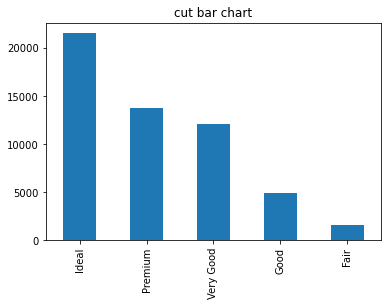

In [10]:
df.cut.value_counts().plot(kind='bar')
plt.title("cut bar chart")
plt.show()

<font color = 'green'> Correct : 2.5 points </font> 

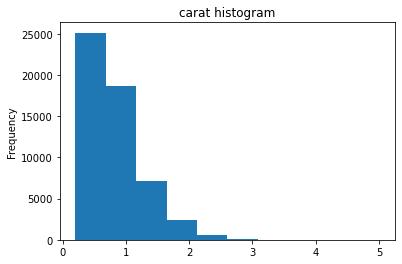

In [11]:
df.carat.plot(kind='hist')
plt.title("carat histogram")
plt.show()

<font color = 'green'> Correct : 2 points </font> 

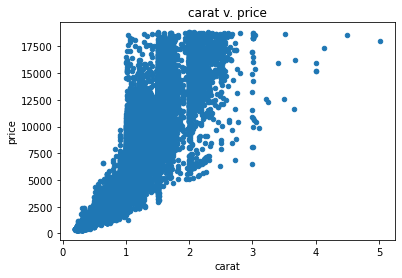

In [12]:
df.plot(x='carat',y='price',kind='scatter')
plt.title('carat v. price')
plt.show()

<font color = 'green'> Correct : 2 points </font> 

In [13]:
correlation=df['carat'].corr(df['price'])
print('correlation carat v. price: ' + str(correlation))

correlation carat v. price: 0.9215913011934761


<font color = 'green'> Correct : 1 point </font> 

### Problem 5 (4 points)

We have a collection of m documents.

Let us say we would like to compare two documents x and y using their document term vectors. 

Let tf_ij be the frequency of the ith word (term) in the jth document

1. Let the vocabulary size (the dimensionality of the vectors) be n. What is a good measure of similarity for this purpose ? Write the formula for it in terms of tf_ij.

2. Consider the variable transformation given by idf_ij = tf_ij * log(m/df_i), where df_i is the document frequency, i.e. the number of documents in which the ith term occurs. The transformed variable idf_ij is called the inverse document frequency. What are the advantages of using this transformed variable instead of the original in the similarity computation ?

### Solution

#### Solution 5.1

cosign similarity(x,y) = (sum(i=1 to n)(tf_ix * tf_iy))/(sqrt((sum(i=1 to n)(tf_ix^2))) * sqrt((sum(i=1 to n)(tf_iy^2)))) where 1<x<m and 1<y<m

In [14]:
def cosine_tf(x,y):
    import math
    dot_product=0
    crossX=0
    crossY=0
    if (len(x) != len(y)):
        print("provide two vectors of the same length")
    else:
        for i in range(len(vector1)):
            tf_ix=x[i]
            ft_iy=y[i]
            test=tf_ix*tf_iy
            dot_product += test
            crossX += tf_ix**2
            crossY += tf_iy**2
        crossX=math.sqrt(crossX)
        crossY=math.sqrt(crossY)
        cosineSimilarity=dot_product/(crossX*crossY)
        return cosineSimilarity

<font color = 'green'> Correct : 2 points </font> 

#### Solution 5.2

The advantages of using the inverse document frequency is that is takes into account the frequency of the ith word of a document relative to the "corpus" of all documents.  If our goal is to measure the similarity between documents, then words that are said often regardless of the document such as "that", "then", "there" etc. should be discounted as they are not distinguishing features.  

<font color = 'green'> Correct : 2 points </font> 

### Problem 6 (6 points)

Write Python functions to compute the Hamming (L1) distance, SMC and Jaccard similarity coefficient between two binary vectors. Use them to these proximity measures between the following vectors:

x = 1010101010101 

y = 1000100010001

### Solution

In [15]:
#hamming L1 distance 
#number of bits we must change to convert one into the other 
def hamming(binary1,binary2):
    if (len(binary1) != len(binary2)):
        return "Provide equal length binaries"
    else:
        binary_length = len(binary1)
        count = 0
        for i in range(binary_length):
            if (binary1[i] != binary2[i]):
                count=count+1
        return count
binary1='1010101010101'
binary2='1000100010001'
print(str(hamming(binary1,binary2)))

3


In [16]:
#SMC
#Defined as number of matching instances/total instances
def SMC(binary1,binary2):
    if (len(binary1) != len(binary2)):
        return "Provide equal length binaries"
    else:
        binary_length = len(binary1)
        count = 0
        for i in range(binary_length):
            if (binary1[i] == binary2[i]):
                count=count+1
        return (count/binary_length)
binary1='1010101010101'
binary2='1000100010001'
print(str(SMC(binary1,binary2)))

0.7692307692307693


In [17]:
#Jaccard Distance 
#like SMC just cut out instances of 00; 
def jaccard(binary1,binary2):
    if (len(binary1) != len(binary2)):
        return "Provide equal length binaries"
    else:
        binary_length = len(binary1)
        count_11 = 0
        count_00 = 0
        for i in range(binary_length):
            if ((binary1[i] == '1') & (binary2[i] == '1')):
                count_11=count_11+1
            if ((binary1[i] == '0') & (binary2[i] == '0')):
                count_00=count_00+1
        return count_11/(binary_length-count_00)
binary1='1010101010101'
binary2='1000100010001'
print(str(jaccard(binary1,binary2)))

0.5714285714285714


<font color='green'> Correct : 6 points </font> 

### Problem 7 (6 points)

Calculate the indicated similarity or distance measures of the vectors show below (you can do this by hand or by writing code, but please show the computation either way):

x = (1,1,1,1) and y = (3,3,3,3) : cosine, correlation, Euclidean

x = (0,1,0,1,0,1) and y = (1,0,1,0,1,0) : cosine, correlation, Euclidean, Jaccard 

x = (1,1,0,1,0,1) and y = (1,1,1,0,0,1) : cosine, correlation, Lmax, Jaccard

### Solution

In [18]:
#function for cosine similarity
def cosine(vector1,vector2):
    import math
    dot_product=0
    crossX=0
    crossY=0
    if (len(vector1) != len(vector2)):
        print("provide two vectors of the same length")
    else:
        for i in range(len(vector1)):
            test=vector1[i]*vector2[i]
            dot_product += test
            crossX += vector1[i]**2
            crossY += vector2[i]**2
        crossX=math.sqrt(crossX)
        crossY=math.sqrt(crossY)
        cosineSimilarity=dot_product/(crossX*crossY)
        return cosineSimilarity

In [19]:
#function for correlation
def corr(vector1, vector2):
    import numpy as np
    x=vector1
    y=vector2
    xbar = 0
    ybar = 0
    sXY = 0
    sX = 0
    sY = 0
    n = len(vector1)
    if (n != len(vector2)):
        print("provide two vectors of the same length")
    else:
        for i in range(n):
            xbar += x[i]
            ybar += y[i]
        xbar=xbar/n
        ybar=ybar/n
        for i in range(n):
            sXY += ((x[i] - xbar)*(y[i]-ybar))
            sX += ((x[i]-xbar)**2)
            sY += ((y[i]-ybar)**2)
        sXY=sXY*(1/(n-1))
        sX = sX*(1/(n-1))
        sY = sY*(1/(n-1))
        correlation=sXY/((sX*sY)**(1/2))
        return correlation

In [20]:
#function for Euclidian
def euclidian(vector1, vector2):
    import numpy as np
    sumSquareDiff=0
    if (len(vector1) != len(vector2)):
        print("provide two vectors of the same length")
    else:
        for i in range(len(vector1)):
            sumSquareDiff += ((vector1[i]-vector2[i])**2)
        distance = np.sqrt(sumSquareDiff)
        return distance

In [21]:
#function for LMAX
def lmax(vector1,vector2):
    import numpy as np
    if (len(vector1) != len(vector2)):
        print("provide two vectors of the same length")
    
    else:
        r=100000
        absSum = 0
        for i in range(len(vector1)):
            absSum += (np.abs(vector1[i]-vector2[i])**r)
        LMAX=absSum**(1/r)
        return LMAX

In [22]:
#first set
x=[1,1,1,1]
y=[3,3,3,3]
print("x: "+str(x))
print("y: "+str(y))
print("cosine: "+str(cosine(x,y)))
print("correlation: nan")
print("euclidian: " + str(euclidian(x,y)))


x: [1, 1, 1, 1]
y: [3, 3, 3, 3]
cosine: 1.0
correlation: nan
euclidian: 4.0


In [23]:
#second set
x=[0,1,0,1,0,1]
y=[1,0,1,0,1,0]
print("x: "+str(x))
print("y: "+str(y))
print("cosine: "+str(cosine(x,y)))
print("correlation: "+ str(corr(x,y)))
print("euclidian: " + str(euclidian(x,y)))
print("jaccard: "+str(jaccard('010101','101010')))


x: [0, 1, 0, 1, 0, 1]
y: [1, 0, 1, 0, 1, 0]
cosine: 0.0
correlation: -1.0
euclidian: 2.449489742783178
jaccard: 0.0


In [24]:
#third set
#second set
x=[1,1,0,1,0,1]
y=[1,1,1,0,0,1]
print("x: "+str(x))
print("y: "+str(y))
print("cosine: "+str(cosine(x,y)))
print("correlation: "+ str(corr(x,y)))
print("LMAX: " + str(lmax(x,y)))
print("jaccard: "+str(jaccard('110101','111001')))

x: [1, 1, 0, 1, 0, 1]
y: [1, 1, 1, 0, 0, 1]
cosine: 0.75
correlation: 0.25
LMAX: 1.0000069314958282
jaccard: 0.6


<font color = 'blue'> Partially Correct : 5.67 points </font>

### Submission instructions

1. Your assignment should be completed by filling in the empty solution cells in this Jupyter notebook file (.ipynb). Feel free to add more cells as needed.

2. Please comment your code using either markdown or #comments and use meaningful variable names to make it as readable and intelligible as possible.

3. Write your code in the form of functions. For example: 

    def my_code ():

          #Write code here
      
          return "The return value"
          

4. If the problem is to find the value of 'x', printing 'x = (your answer)' will help us identify if your code worked.


5. For code that refers to local data files downloaded from the internet, please keep the file path simple (e.g. ~/downloads/datafilename) so that it works on our copy of the dataset. Please do not modify either the filename or the file contents in any way.

6. Solution to problems that do not require any coding can be typed up in their own cells using markdown.
    
7. Unless there are legitimate circumstances, late assignments will not be accepted.

8. All assignments are individual.

9. All the sources used for problem solution must be acknowledged, e.g. web sites, books, research papers, etc.

10. Academic integrity is taken seriously; for detailed information see the RIT Honor Code and with RIT's Academic Integrity Policy.

<font color = 'green'> Total score : 49.67 points </font>